In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#fig = plt.gcf()
#fig.set_size_inches(12, 8)

In [2]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

sheets = gc.open('BattleSnake Data')
df = pd.DataFrame()
worksheets = []
for sheet in sheets:
    # get_all_values gives a list of rows.
    rows = sheet.get_all_values()
    rows = rows[:181]
    df2 = pd.DataFrame.from_records(rows[1:], columns=rows[0])
    df2 = df2.drop(columns=[''])
    df2 = df2[df2 != '']
    df2 = df2.dropna(how = 'all')
    df2['Snake'] = sheet.title
    worksheets.append(df2)

df = pd.concat(worksheets, ignore_index=True, sort=False)

#df['Set'] = df['Set'].astype('category')
df['Run'] = pd.to_numeric(df['Run'], errors='coerce')
df['Turn #'] = pd.to_numeric(df['Turn #'], errors='coerce')
df['Length'] = pd.to_numeric(df['Length'], errors='coerce')
#df['Death Reason'] = df['Death Reason'].astype('category')
#df['Win?'] = df['Win?'].astype('category')
df['# Kills'] = pd.to_numeric(df['# Kills'], errors='coerce')
#df['Snake'] = df['Snake'].astype('category')

display(df)

,Set,Run,Turn #,Length,Death Reason,Win?,# Kills,Snake
0,Noodle,1,355,51,Moved out of bounds,N/A,NaN,Noodle
1,Noodle,2,252,42,Collided with itself,N/A,NaN,Noodle
2,Noodle,3,374,58,Collided with itself,N/A,NaN,Noodle
3,Noodle,4,291,53,Collided with itself,N/A,NaN,Noodle
4,Noodle,5,366,55,Collided with itself,N/A,NaN,Noodle
...,...,...,...,...,...,...,...,...
685,NomNom v HeadHunter v Noodle v Hot Soup,26,10,5,Lost head-to-head with HeadHunter,N,1.0,NomNom
686,NomNom v HeadHunter v Noodle v Hot Soup,27,8,5,Lost head-to-head with HeadHunter,N,1.0,NomNom
687,NomNom v HeadHunter v Noodle v Hot Soup,28,10,5,Lost head-to-head with HeadHunter,N,1.0,NomNom
688,NomNom v HeadHunter v Noodle v Hot Soup,29,183,22,Collided with itself,N,1.0,NomNom


In [3]:
df['Length_Turn'] = df['Length'] / df['Turn #']

In [4]:
dfSolo = df[df["Set"].str.contains("v")==False]
dfComp = df[df["Set"].str.contains("v")]

In [5]:
dfComp['Snakes'] = dfComp['Set'].str.split(' v ')

grouped = df.groupby(['Set', 'Run'])['Length']
dfComp['largest'] = grouped.transform('max')
dfComp['second_largest'] = grouped.transform(lambda x: x.nlargest(2).min())
dfComp['Length Diff Largest'] = dfComp['Length'] - dfComp['largest']
dfComp['Length Diff Second Largest'] = dfComp['Length'] - dfComp['second_largest']
dfComp['Length Diff'] = dfComp['Length Diff Second Largest'] + dfComp['Length Diff Largest'] 
display(dfComp)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,Set,Run,Turn #,Length,Death Reason,Win?,# Kills,Snake,Length_Turn,Snakes,largest,second_largest,Length Diff Largest,Length Diff Second Largest,Length Diff
30,Noodle v Hot Soup,1,28,4,Lost head-to-head with Hot Soup,N,0.0,Noodle,0.142857,"[Noodle, Hot Soup]",5,4,-1,0,-1
31,Noodle v Hot Soup,2,317,36,Moved out of bounds,N,0.0,Noodle,0.113565,"[Noodle, Hot Soup]",36,29,0,7,7
32,Noodle v Hot Soup,3,177,27,Collided with itself,N,0.0,Noodle,0.152542,"[Noodle, Hot Soup]",27,16,0,11,11
33,Noodle v Hot Soup,4,12,4,Lost head-to-head with Hot Soup,N,0.0,Noodle,0.333333,"[Noodle, Hot Soup]",5,4,-1,0,-1
34,Noodle v Hot Soup,5,243,30,N/A,Y,1.0,Noodle,0.123457,"[Noodle, Hot Soup]",30,20,0,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,NomNom v HeadHunter v Noodle v Hot Soup,26,10,5,Lost head-to-head with HeadHunter,N,1.0,NomNom,0.500000,"[NomNom, HeadHunter, Noodle, Hot Soup]",21,13,-16,-8,-24
686,NomNom v HeadHunter v Noodle v Hot Soup,27,8,5,Lost head-to-head with HeadHunter,N,1.0,NomNom,0.625000,"[NomNom, HeadHunter, Noodle, Hot Soup]",25,16,-20,-11,-31
687,NomNom v HeadHunter v Noodle v Hot Soup,28,10,5,Lost head-to-head with HeadHunter,N,1.0,NomNom,0.500000,"[NomNom, HeadHunter, Noodle, Hot Soup]",16,15,-11,-10,-21
688,NomNom v HeadHunter v Noodle v Hot Soup,29,183,22,Collided with itself,N,1.0,NomNom,0.120219,"[NomNom, HeadHunter, Noodle, Hot Soup]",22,19,0,3,3


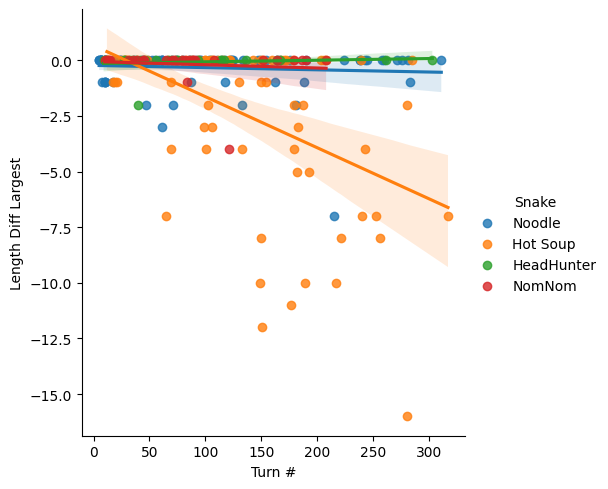

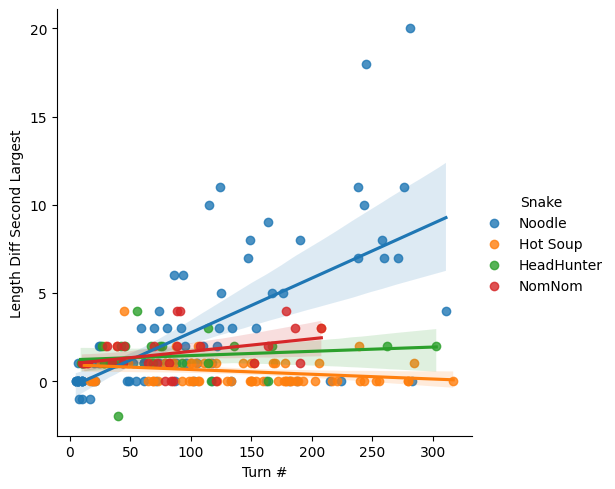

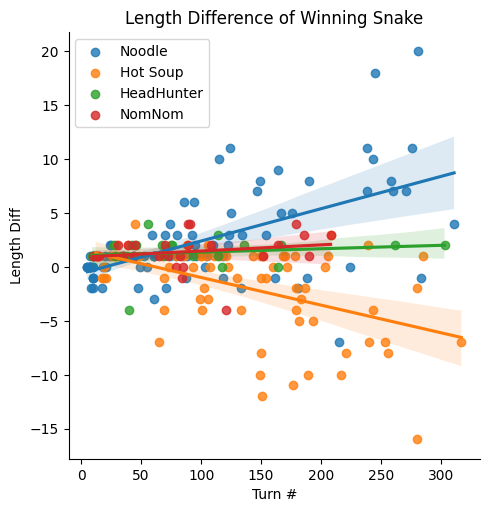

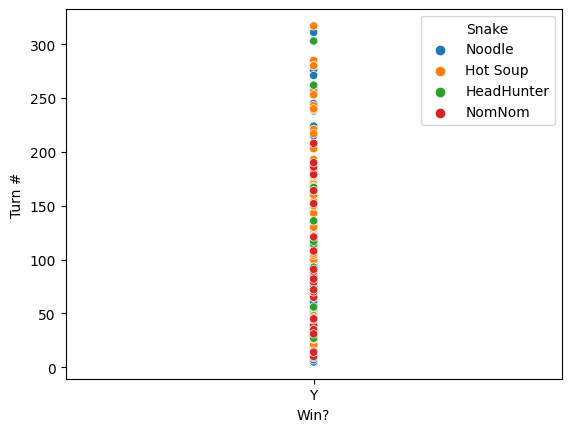

In [28]:
# Win vs Length Diff
#dfCompP1 = dfComp[(dfComp['Length Diff Largest'] != 0) & (dfComp['Length Diff Second Largest'] == 0)]
#dfCompP2 = dfComp[(dfComp['Length Diff Largest'] == 0) & (dfComp['Length Diff Second Largest'] != 0)]
#dfCompP = pd.concat([dfCompP1, dfCompP2])
dfCompP = dfComp[dfComp['Win?'] == 'Y']

plot_ = sns.lmplot(x='Turn #', y='Length Diff Largest', data=dfCompP, hue='Snake')
plt.show()

plot_ = sns.lmplot(x='Turn #', y='Length Diff Second Largest', data=dfCompP, hue='Snake')
plt.show()

plot_ = sns.lmplot(legend=False, x='Turn #', y='Length Diff', data=dfCompP, hue='Snake').set(title="Length Difference of Winning Snake")
plt.legend(loc='best')
plt.show()

plot_ = sns.scatterplot(x='Win?', y='Turn #', data=dfCompP, hue='Snake')
plt.show()

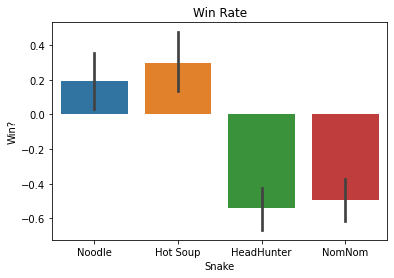

In [8]:
dfCompP = dfComp.copy()
dfCompP['Win?'] = dfCompP['Win?'].replace('Y', 1)
dfCompP['Win?'] = dfCompP['Win?'].replace('T', 0)
dfCompP['Win?'] = dfCompP['Win?'].replace('N', -1)
plot_ = sns.barplot(x='Snake', y='Win?', data=dfCompP).set(title="Win Rate")
plt.show()

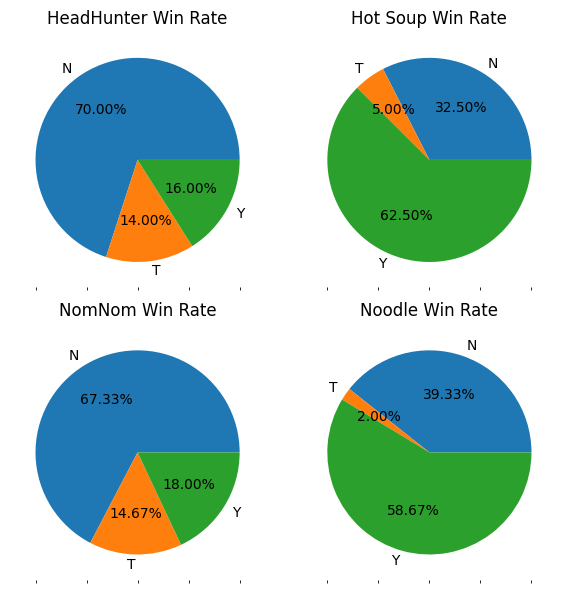

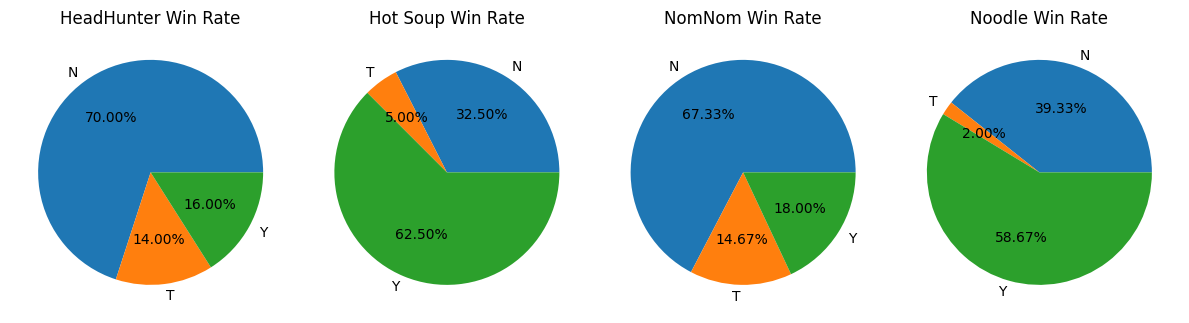

In [32]:
dfP = dfComp.groupby(['Win?', 'Snake']).size().unstack(fill_value=0)
dfP.plot.pie(subplots=True, layout=(2, 2), legend=False, autopct='%.2f%%', figsize=(6,6), ylabel='', title=['HeadHunter Win Rate', 'Hot Soup Win Rate', 'NomNom Win Rate', 'Noodle Win Rate'])
plt.tight_layout()
plt.show()

dfP = dfComp.groupby(['Win?', 'Snake']).size().unstack(fill_value=0)
dfP.plot.pie(subplots=True, legend=False, autopct='%.2f%%', figsize=(12,6), ylabel='', title=['HeadHunter Win Rate', 'Hot Soup Win Rate', 'NomNom Win Rate', 'Noodle Win Rate'])
plt.tight_layout()
plt.show()

In [10]:
dfP = df.copy()
dfP = dfP[dfP['Death Reason'] != 'N/A']
dfP['Death Reason'][dfP['Death Reason'].str.contains('head-to-head')] = "Head-To-Head Collision"
dfP['Death Reason'][dfP['Death Reason'].str.contains('body')] = "Body Collision"
dfP['Death Reason'][dfP['Death Reason'].str.contains('self')] = "Self Collision"
dfP['Death Reason'][dfP['Death Reason'].str.contains('bounds')] = "Out of Bounds"
dfP['Death Reason'][dfP['Death Reason'].str.contains('health')] = "Out of Health"
dfPG = dfP.groupby(['Death Reason', 'Snake']).size().unstack()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Se

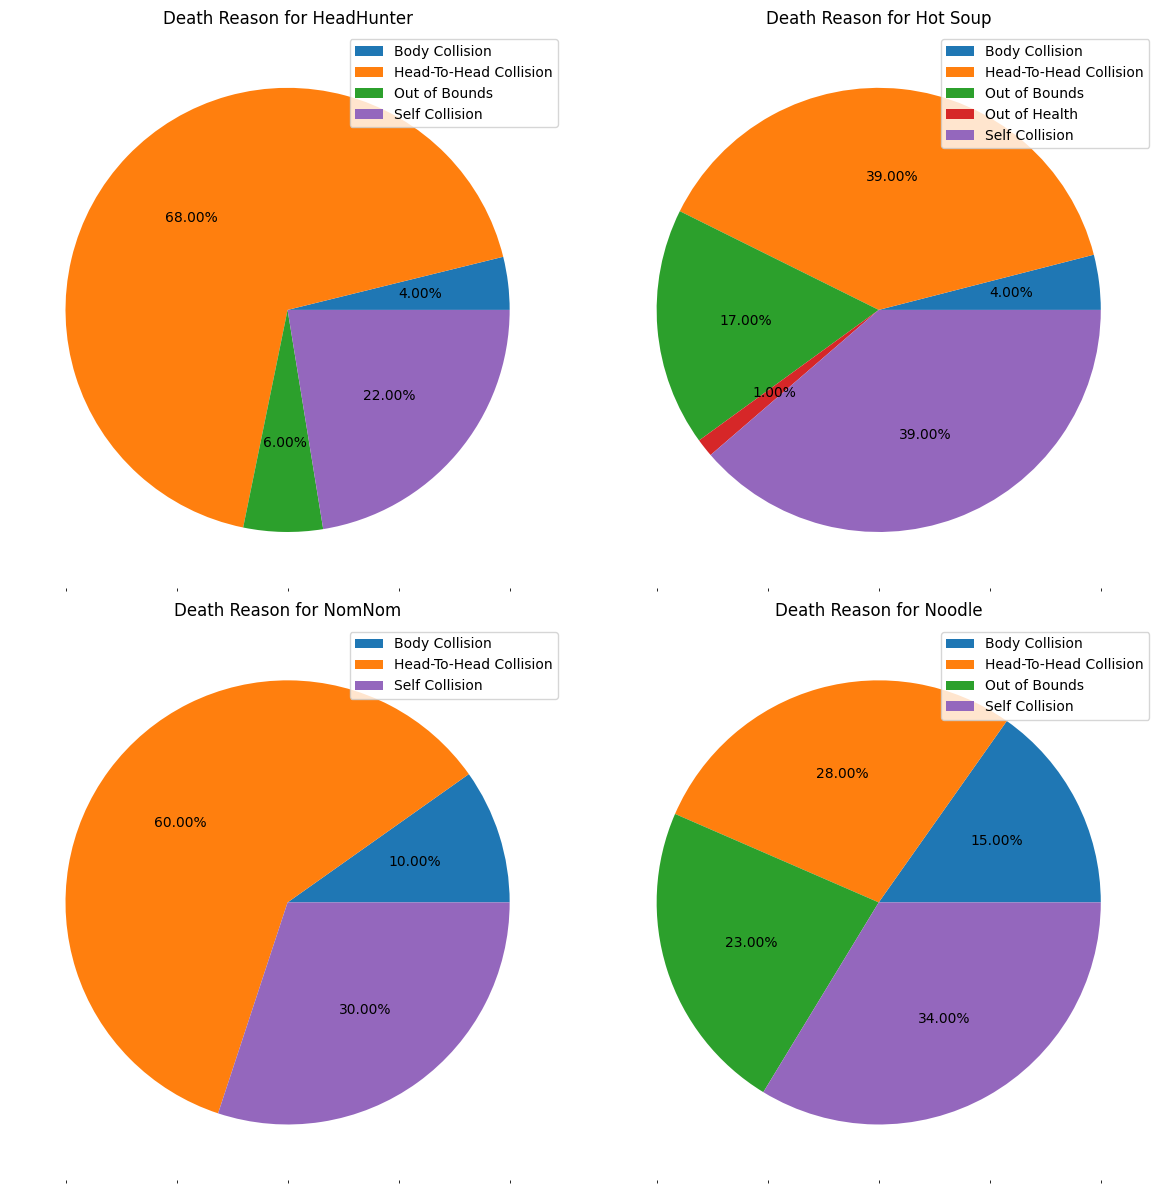

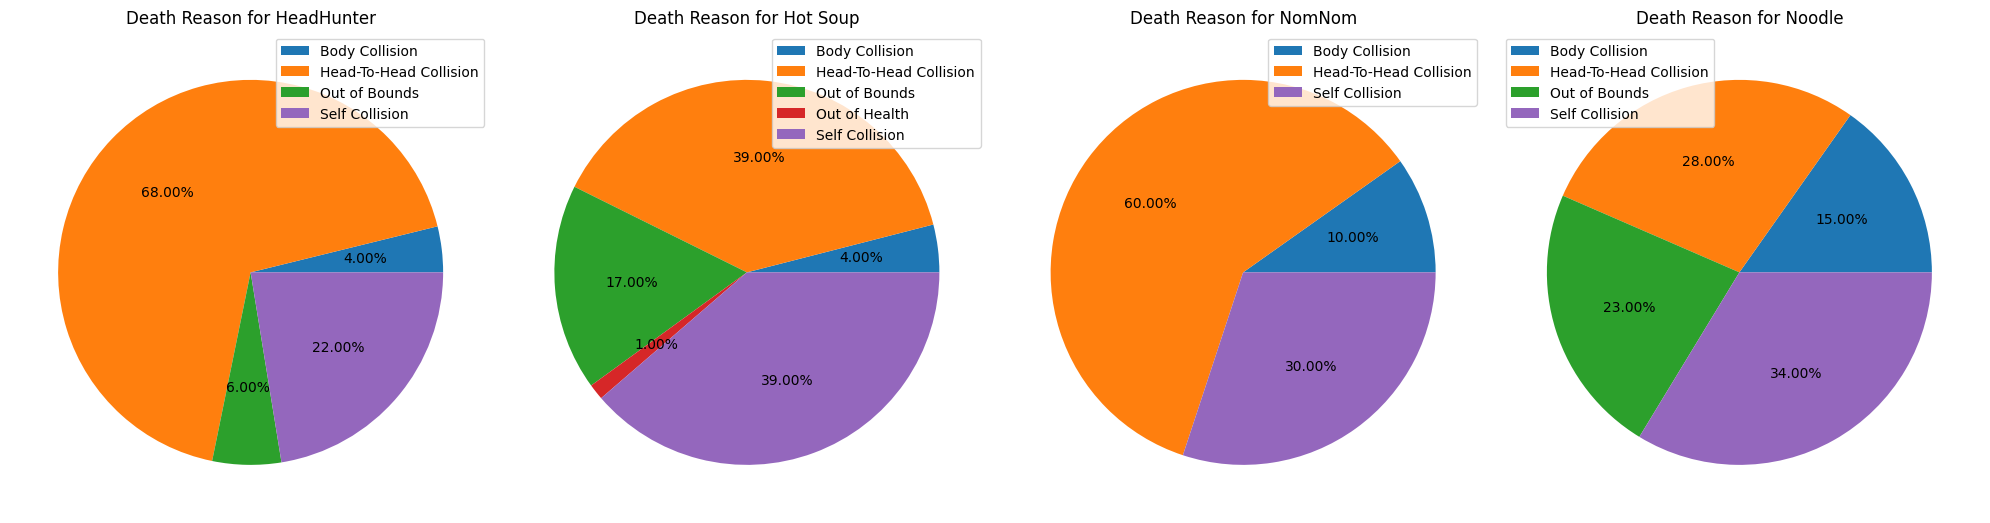

In [40]:
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['legend.fontsize'] = 10
axs = dfPG.plot.pie(legend=True, subplots=True, layout=(2, 2), figsize=(12,12), autopct=lambda p: '{:.2f}%'.format(round(p)) if p > 0 else '', labeldistance=None, ylabel='', title=['Death Reason for HeadHunter', 'Death Reason for Hot Soup', 'Death Reason for NomNom', 'Death Reason for Noodle'])
plt.tight_layout()
plt.show()
plt.rcParams.update(plt.rcParamsDefault)

plt.rcParams['axes.titlesize'] = 12
plt.rcParams['legend.fontsize'] = 10
axs = dfPG.plot.pie(legend=True, subplots=True, figsize=(20,10), autopct=lambda p: '{:.2f}%'.format(round(p)) if p > 0 else '', labeldistance=None, ylabel='', title=['Death Reason for HeadHunter', 'Death Reason for Hot Soup', 'Death Reason for NomNom', 'Death Reason for Noodle'])
plt.tight_layout()
plt.show()
plt.rcParams.update(plt.rcParamsDefault)

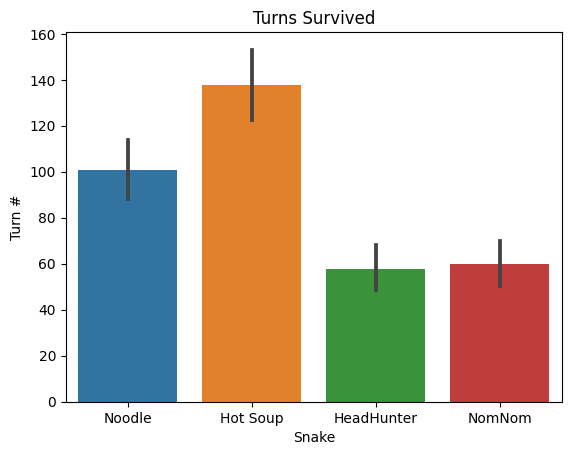

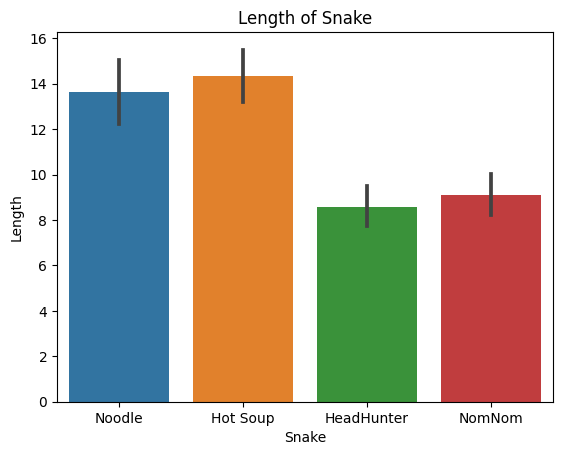

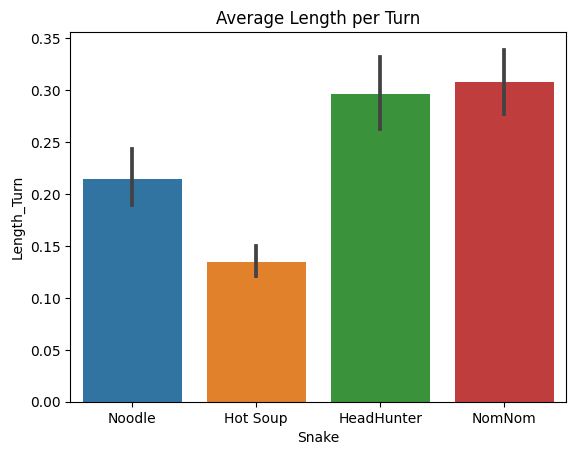

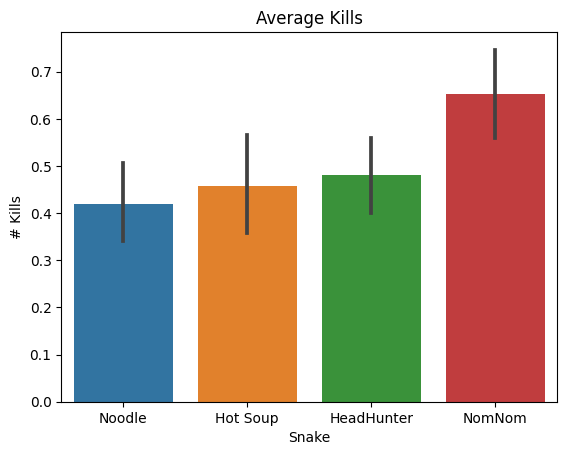

In [12]:
# Snake avg length / Time alive

plot_ = sns.barplot(x='Snake', y='Turn #', data=dfComp).set(title="Turns Survived")
plt.show()
plot_ = sns.barplot(x='Snake', y='Length', data=dfComp).set(title="Length of Snake")
plt.show()

plot_ = sns.barplot(x='Snake', y='Length_Turn', data=dfComp).set(title="Average Length per Turn")
plt.show()
plot_ = sns.barplot(x='Snake', y='# Kills', data=dfComp).set(title="Average Kills")
plt.show()

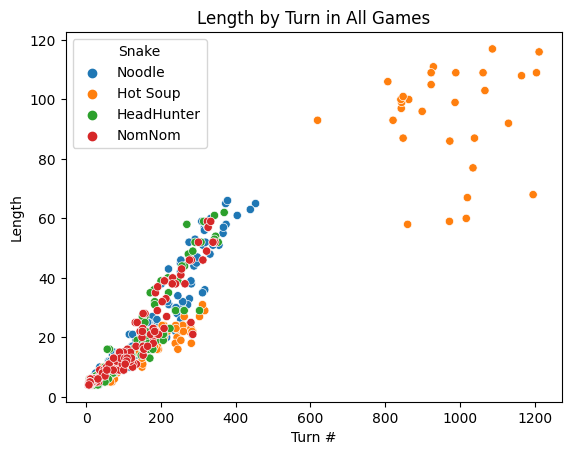

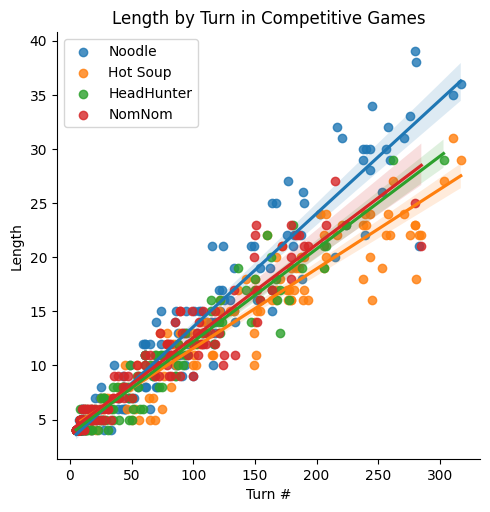

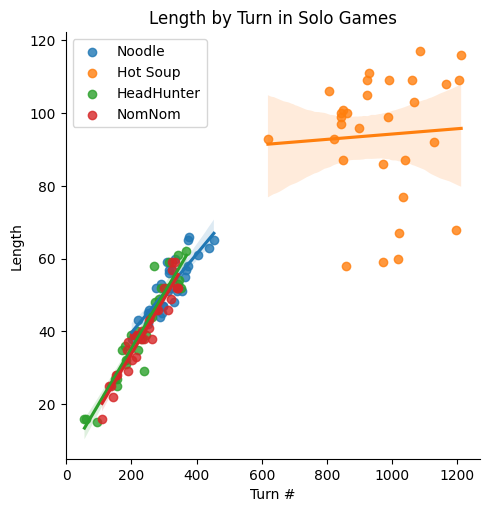

In [14]:
# Turn num vs Length
plot_ = sns.scatterplot(x='Turn #', y='Length', data=df, hue='Snake').set(title="Length by Turn in All Games")
plt.show()

plot_ = sns.lmplot(x='Turn #', y='Length', data=dfComp, hue='Snake', legend=False).set(title="Length by Turn in Competitive Games")
plt.legend(loc='best')
plt.show()

plot_ = sns.lmplot(x='Turn #', y='Length', data=dfSolo, hue='Snake', legend=False).set(title="Length by Turn in Solo Games")
plt.legend(loc='best')
plt.show()